# Example: Per-Sample Bottleneck

### Load a Model and Normalize an Example Input

In [1]:
from torchvision import models, transforms
from attribution_bottleneck.utils.misc import prepare_image
from PIL import Image

device = "cuda"  # Change to "cuda" to run on GPU
model = models.resnet50(pretrained=True)
ex_image = Image.open("monkeys.jpg")
ex_input = prepare_image(ex_image)
ex_target = 382  # 382: squirrel monkey

### Initialize Distribution Estimator
We use a precalculated estimation of mean and standard deviation of the output of the second block in the ResNet-30, which is called "layer_2" in the torchvision package.

In [2]:
from attribution_bottleneck.bottleneck.estimator import ReluEstimator
estim = ReluEstimator(model.layer2)
estim.load("weights/estimator_resnet50_2.torch")

### Initialize Per-Sample Bottleneck Reader

In [5]:
from attribution_bottleneck.attribution.per_sample_bottleneck import PerSampleBottleneckReader
reader = PerSampleBottleneckReader(model, estim, progbar=True)

## Generate and Normalize Heatmaps
To visualize the generated heatmaps, we need to normalize them to [0,1]

In [6]:
heatmap = reader.heatmap(ex_input, ex_target)

Training Bottleneck: 100%|██████████| 10/10 [00:12<00:00,  1.26s/it]


## Compare Heatmap Images

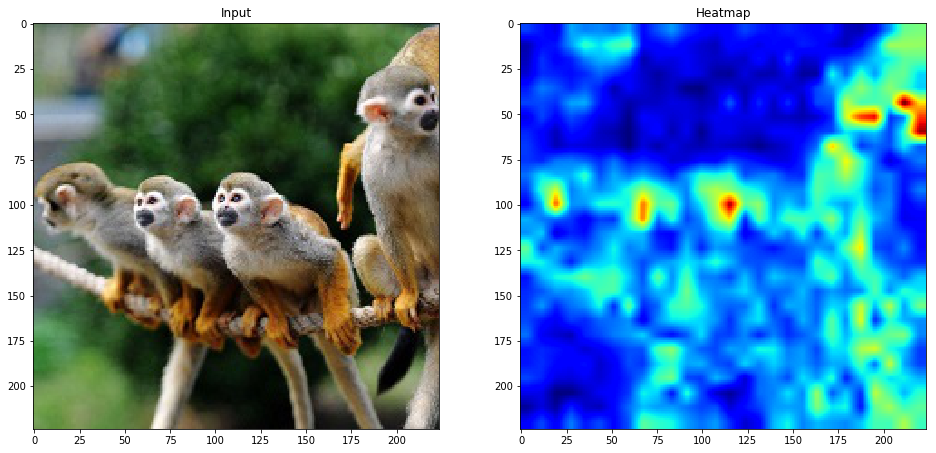

In [7]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(16,8))

# Draw the original input
plt.subplot(1, 2, 1)
plt.imshow(np.asarray(ex_image))
plt.title("Input")

# Draw the heatmap
plt.subplot(1, 2, 2)
plt.imshow(heatmap, cmap="jet")
plt.title("Heatmap")

plt.show()